In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import collections
import community.community_louvain as community_louvain

In [2]:
# !pip install community
# !pip install networkx
# !pip install python-louvain

In [3]:
data = pd.read_csv("./Data/student_all.csv")

In [4]:
data.rename(columns={"sex":"gender"}, inplace=True)

In [5]:
data.drop(columns='Unnamed: 0', inplace=True)

In [6]:
data['alc'] = data['Dalc'] + data['Walc']

In [7]:
indexes = [i for i in range(data.shape[0])]
indexes = pd.DataFrame({"Names":indexes})
indexes
data = pd.concat([data, indexes], axis=1)

In [8]:
data["guardian"][data["guardian"] == "father"] = "parent"
data["guardian"][data["guardian"] == "mother"] = "parent"

C:\Users\Marin\AppData\Local\Temp/ipykernel_6352/3828257580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["guardian"][data["guardian"] == "father"] = "parent"
C:\Users\Marin\AppData\Local\Temp/ipykernel_6352/3828257580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["guardian"][data["guardian"] == "mother"] = "parent"


In [9]:
data['absences'][(data["absences"] > 0) & (data["absences"] < 11)] = 1

C:\Users\Marin\AppData\Local\Temp/ipykernel_6352/2866260647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['absences'][(data["absences"] > 0) & (data["absences"] < 11)] = 1


In [10]:
data["guardian"].unique()

array(['parent', 'other'], dtype=object)

In [11]:
data.head(10)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,course,alc,Names
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,1,5,6,6,mat,2,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,1,5,5,6,mat,2,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,1,7,8,10,mat,5,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,1,15,14,15,mat,2,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,1,6,10,10,mat,3,4
5,GP,M,16,U,LE3,T,4,3,services,other,...,1,2,5,1,15,15,15,mat,3,5
6,GP,M,16,U,LE3,T,2,2,other,other,...,1,1,3,0,12,12,11,mat,2,6
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,1,1,1,6,5,6,mat,2,7
8,GP,M,15,U,LE3,A,3,2,services,other,...,1,1,1,0,16,18,19,mat,2,8
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,5,0,14,15,15,mat,2,9


In [12]:
data.shape

(1044, 36)

In [13]:
data.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'course', 'alc',
       'Names'],
      dtype='object')

In [14]:
# To install a package in a Jupyter Notebook
# !pip install *package name*

In [15]:
data_vec = data.to_numpy()

In [44]:
data_vec.shape

(1044, 36)

In [16]:
data_vec

array([['GP', 'F', 18, ..., 'mat', 2, 0],
       ['GP', 'F', 17, ..., 'mat', 2, 1],
       ['GP', 'F', 15, ..., 'mat', 5, 2],
       ...,
       ['MS', 'F', 18, ..., 'por', 2, 1041],
       ['MS', 'M', 17, ..., 'por', 7, 1042],
       ['MS', 'M', 18, ..., 'por', 7, 1043]], dtype=object)

In [17]:
data_vec[1, :]

array(['GP', 'F', 17, 'U', 'GT3', 'T', 1, 1, 'at_home', 'other', 'course',
       'parent', 1, 2, 0, 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes',
       'no', 5, 3, 3, 1, 1, 3, 1, 5, 5, 6, 'mat', 2, 1], dtype=object)

In [18]:
data_vec[1, 1] == data_vec[1, 1]

True

In [19]:
data_vec.shape

(1044, 36)

In [20]:
G = nx.Graph()

In [21]:
# TODO: Define a threshold
# lim -> 0 similare
# lim -> infinite different
list_of_scores = []
for vec in range(1, data_vec.shape[0]):
    for vecs in range(data_vec.shape[0]):
        list_difference = []
        for col in range(data_vec.shape[1]):
            list_difference.append(data_vec[vec - 1, col-1] != data_vec[vecs, col-1])
            diff_score = sum(list_difference)
            list_of_scores.append(diff_score)
        if diff_score < 9:
            G.add_edge(data_vec[vec, -1], data_vec[vecs, -1])
        else: 
            pass

In [22]:
print(f"Len: {len(list_of_scores)}")
print(f"Mean: {round(np.mean(list_of_scores), 4)}")
print(f"Median: {np.median(list_of_scores)}")
print(f"Max: {np.max(list_of_scores)}")
print(f"Min: {np.min(list_of_scores)}")

Len: 39200112
Mean: 9.8967
Median: 9.0
Max: 34
Min: 0


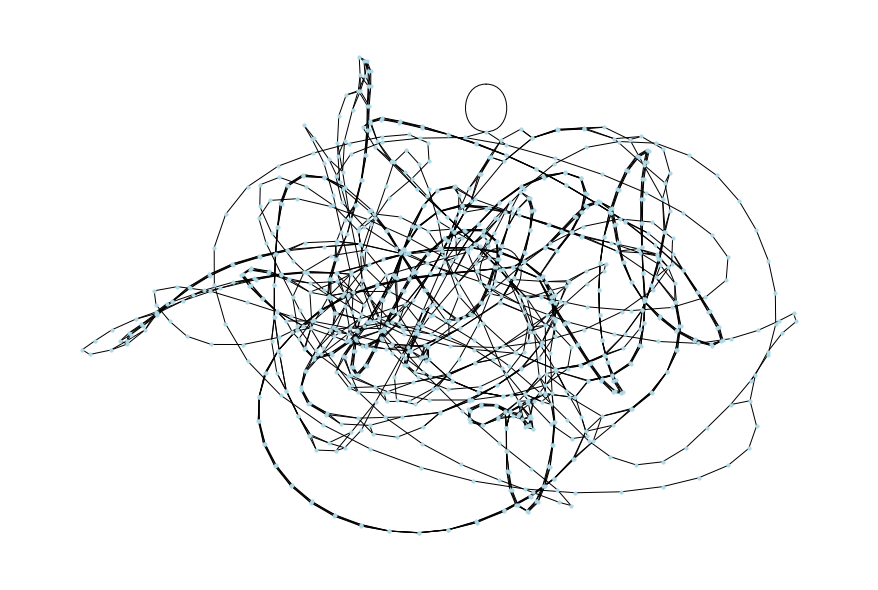

In [23]:
plt.figure(figsize=(12, 8))
graph_options = {
    'node_color': 'lightblue',
    'node_size' : 10,
    "edge_color": 'black'
}

nx.draw(G, **graph_options)
plt.show()

In [24]:
weighting = {'school': 1,
             'gender':1.5,
             'age':0.5,
             'address':1,
             'famsize':0.5,
             'Pstatus':1.5,
             'Medu':1,
             'Fedu':1,
             'Mjob':1.5,
             'Fjob':1.5,
             'reason':0.5,
             'guardian':1,
             'traveltime':0.5,
             'studytime':1,
             'failures':1,
             'schoolsup':1,
             'famsup':1,
             'paid':0.5,
             'activities':1,
             'nursery':0.5,
             'higher':0.5,
             'internet':1.5,
             'romantic':1,
             'famrel':1.5,
             'freetime':0.5,
             'goout':1,
             'Dalc':1.5,
             'Walc':1.5,
             'health':1,
             'absences':1,
             'G1':0.5,
             'G2':0.5,
             'G3':0.5,
             'course':0.5,
             'alc':1.5,
             'Names':0
            }


In [25]:
columns_name = list(data.columns)
list_of_scores = []
for vec in range(1, data_vec.shape[0]):
    for vecs in range(data_vec.shape[0]):
        list_difference = []
        score = 0
        for col in range(data_vec.shape[1]):
            if data_vec[vec - 1, col-1] != data_vec[vecs, col-1]:
                score += weighting[columns_name[col]]
                list_of_scores.append(score)
        
        if score < 10.5:
            G.add_edge(data_vec[vec, -1], data_vec[vecs, -1])
        else: 
            pass
        
# Quid pondérer les arrêtes des graphes
# pour chaque communauté des reprendre les communautés

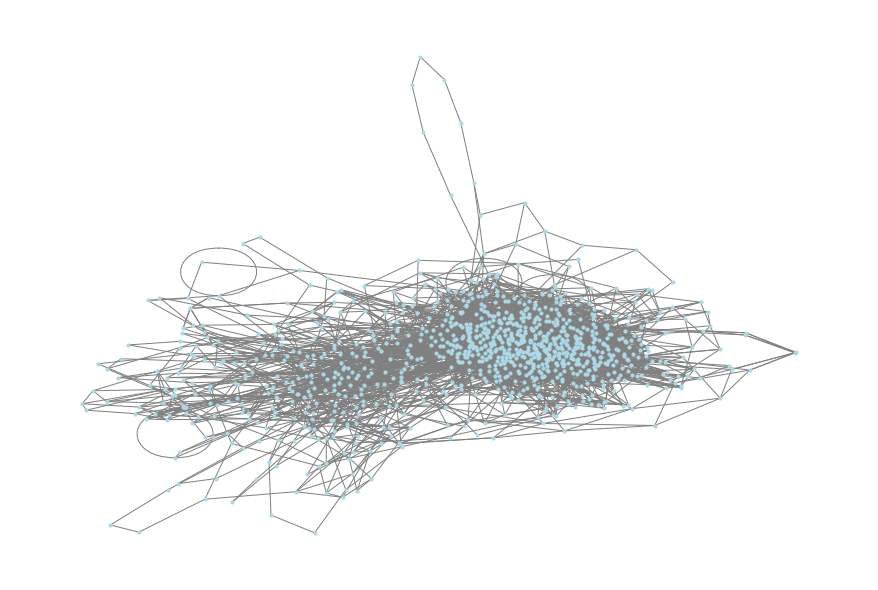

In [26]:
plt.figure(figsize=(12, 8))
graph_options = {
    'node_color': 'lightblue',
    'node_size' : 10,
    "edge_color": 'grey'
}

nx.draw(G, **graph_options, label=True)
plt.show()

In [27]:
print(f"Len: {len(list_of_scores)}")
print(f"Mean: {round(np.mean(list_of_scores), 4)}")
print(f"Median: {np.median(list_of_scores)}")
print(f"Max: {np.max(list_of_scores)}")
print(f"Min: {np.min(list_of_scores)}")

Len: 22089875
Mean: 10.7377
Median: 10.5
Max: 32.5
Min: 1.0


In [28]:
partition = community_louvain.best_partition(G)
len(partition)

1044

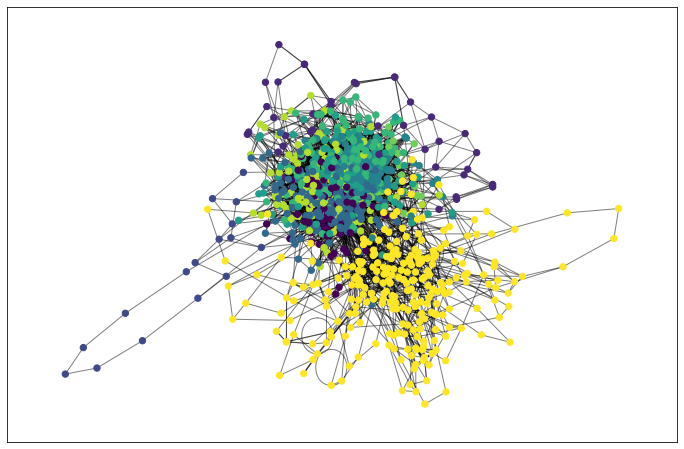

In [29]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [90]:
set(partition.values())
# Donc il y a 10 communautés ?

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [30]:
partition_sort = collections.OrderedDict(sorted(partition.items()))
partition_sort

OrderedDict([(0, 8),
             (1, 0),
             (2, 0),
             (3, 6),
             (4, 6),
             (5, 8),
             (6, 8),
             (7, 8),
             (8, 8),
             (9, 4),
             (10, 4),
             (11, 4),
             (12, 4),
             (13, 6),
             (14, 6),
             (15, 4),
             (16, 4),
             (17, 4),
             (18, 4),
             (19, 4),
             (20, 4),
             (21, 4),
             (22, 4),
             (23, 4),
             (24, 4),
             (25, 4),
             (26, 3),
             (27, 3),
             (28, 6),
             (29, 6),
             (30, 4),
             (31, 4),
             (32, 4),
             (33, 4),
             (34, 3),
             (35, 3),
             (36, 5),
             (37, 5),
             (38, 4),
             (39, 4),
             (40, 6),
             (41, 6),
             (42, 4),
             (43, 4),
             (44, 6),
             (45, 6)

In [36]:
partition_sorted = dict(sorted(partition.items()))
partition_sorted

{0: 8,
 1: 0,
 2: 0,
 3: 6,
 4: 6,
 5: 8,
 6: 8,
 7: 8,
 8: 8,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 6,
 14: 6,
 15: 4,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 4,
 21: 4,
 22: 4,
 23: 4,
 24: 4,
 25: 4,
 26: 3,
 27: 3,
 28: 6,
 29: 6,
 30: 4,
 31: 4,
 32: 4,
 33: 4,
 34: 3,
 35: 3,
 36: 5,
 37: 5,
 38: 4,
 39: 4,
 40: 6,
 41: 6,
 42: 4,
 43: 4,
 44: 6,
 45: 6,
 46: 6,
 47: 6,
 48: 6,
 49: 6,
 50: 6,
 51: 7,
 52: 7,
 53: 7,
 54: 7,
 55: 7,
 56: 4,
 57: 4,
 58: 4,
 59: 7,
 60: 7,
 61: 7,
 62: 7,
 63: 7,
 64: 7,
 65: 5,
 66: 5,
 67: 5,
 68: 5,
 69: 5,
 70: 6,
 71: 6,
 72: 6,
 73: 6,
 74: 6,
 75: 6,
 76: 6,
 77: 6,
 78: 6,
 79: 0,
 80: 0,
 81: 8,
 82: 8,
 83: 8,
 84: 6,
 85: 6,
 86: 6,
 87: 6,
 88: 6,
 89: 6,
 90: 6,
 91: 6,
 92: 6,
 93: 6,
 94: 8,
 95: 8,
 96: 8,
 97: 8,
 98: 4,
 99: 4,
 100: 4,
 101: 4,
 102: 4,
 103: 4,
 104: 4,
 105: 4,
 106: 3,
 107: 3,
 108: 3,
 109: 5,
 110: 5,
 111: 5,
 112: 5,
 113: 5,
 114: 5,
 115: 4,
 116: 4,
 117: 3,
 118: 3,
 119: 3,
 120: 0,
 121: 0,
 122: 0,
 12

In [50]:
partition_sorted = pd.DataFrame.from_dict(partition_sorted, orient="index")

TypeError: 'numpy.ndarray' object is not callable

In [51]:
partition_sorted

,0
0,8
1,0
2,0
3,6
4,6
...,...
1039,9
1040,9
1041,9
1042,9


In [55]:
data = pd.concat([data, partition_sorted], axis=1)

In [56]:
data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Names,0
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,1,5,6,6,mat,2,0,8
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,1,5,5,6,mat,2,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,1,7,8,10,mat,5,2,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,1,15,14,15,mat,2,3,6
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,1,6,10,10,mat,3,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,2,5,1,10,11,10,por,3,1039,9
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,1,15,15,16,por,2,1040,9
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,5,1,11,12,9,por,2,1041,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,1,10,10,10,por,7,1042,9


In [61]:
data.rename({0:"Community"}, axis=1, inplace=True)

In [62]:
data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Names,Community
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,1,5,6,6,mat,2,0,8
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,1,5,5,6,mat,2,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,1,7,8,10,mat,5,2,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,1,15,14,15,mat,2,3,6
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,1,6,10,10,mat,3,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,2,5,1,10,11,10,por,3,1039,9
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,1,15,15,16,por,2,1040,9
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,5,1,11,12,9,por,2,1041,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,1,10,10,10,por,7,1042,9


In [66]:
data[data['Community'] == 0]

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Names,Community
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,1,5,5,6,mat,2,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,1,7,8,10,mat,5,2,0
79,GP,F,16,U,GT3,T,3,4,at_home,other,...,2,3,12,5,5,5,mat,3,79,0
80,GP,M,15,U,GT3,T,2,3,other,services,...,3,3,1,10,12,12,mat,4,80,0
120,GP,F,15,U,GT3,T,1,2,at_home,services,...,2,1,1,16,15,15,mat,3,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,GP,F,17,R,GT3,T,2,4,at_home,other,...,1,5,0,15,15,15,por,2,781,0
784,GP,F,18,U,LE3,T,2,2,other,other,...,1,2,0,10,9,12,por,2,784,0
793,GP,F,18,U,GT3,T,2,3,at_home,other,...,2,3,0,11,12,14,por,3,793,0
794,GP,F,18,U,GT3,T,3,2,other,services,...,3,1,1,14,16,17,por,5,794,0


In [67]:
data[data['Community'] == 0].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc,Names,Community
count,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.0
mean,16.962500,1.962500,2.112500,1.36250,2.250000,0.162500,3.887500,2.950000,3.112500,1.52500,2.22500,3.300000,2.112500,11.250000,11.137500,11.312500,3.750000,471.687500,0.0
std,1.084339,0.818207,0.967755,0.66072,0.665611,0.538252,0.826672,0.953342,0.927686,1.04306,1.41399,1.353851,4.155197,2.844048,3.071897,3.931675,2.308487,229.882777,0.0
min,15.000000,1.000000,1.000000,1.00000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,1.000000,0.000000,5.000000,0.000000,0.000000,2.000000,1.000000,0.0
25%,16.000000,1.000000,1.000000,1.00000,2.000000,0.000000,3.750000,3.000000,3.000000,1.00000,1.00000,2.750000,0.000000,9.000000,9.000000,10.000000,2.000000,271.750000,0.0
50%,17.000000,2.000000,2.000000,1.00000,2.000000,0.000000,4.000000,3.000000,3.000000,1.00000,2.00000,3.000000,1.000000,11.000000,11.000000,12.000000,3.000000,536.500000,0.0
75%,18.000000,2.000000,3.000000,2.00000,3.000000,0.000000,4.000000,3.000000,4.000000,2.00000,3.00000,5.000000,1.000000,13.000000,13.000000,14.000000,5.000000,662.500000,0.0
max,19.000000,4.000000,4.000000,4.00000,4.000000,3.000000,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,16.000000,18.000000,18.000000,19.000000,10.000000,813.000000,0.0
